- 목적: 연비예측
- 데이터셋: auto_mpg
- 피쳐/속성 : 
- 타겟/라벨 :  
- 학습방법 : 지도학습 + 회귀 
- 학습알고리즘 : 선형회귀분석 <= 데이터분포가 선형 분포가 되어야함

[1] 데이터준비

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv(r'C:\Users\kdp\Desktop\KDT\EX_ML06\data\auto_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
df['kpl']= df.mpg*0.425144

In [52]:
df['horsepower'].replace('?',np.nan,inplace=True)

In [53]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
kpl             0
dtype: int64

In [46]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin,kpl
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,1.000000
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.420289
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.563450
kpl,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,1.000000


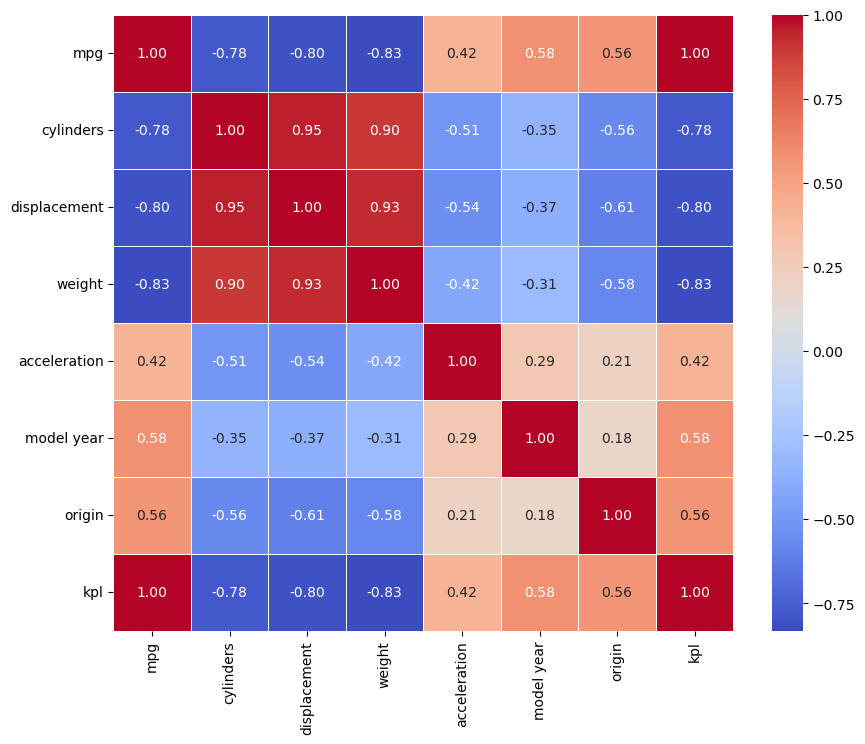

In [47]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

- 피쳐 선택 -> cylinders, weight,displacement +@ mpg ?

In [48]:
# 현재 데이터의 분포 확인 
plt.plot(hour,jumsu,'go')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.show()

NameError: name 'hour' is not defined

In [ ]:
### 학습용 데이터셋 구성
dataDF=pd.DataFrame({'Hour':hour, 'Lesson':lesson})
jumsuSR=pd.Series(jumsu)

[2] 학습 진행 - 다중 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 모듈 인스턴스 생성
model=LinearRegression()

# 학습 진행     => coef_, intercept_
model.fit(dataDF, jumsuSR)

In [ ]:
# 모델 파라미터 -> 피쳐가 2개 ==> coef_2개
print(f'model.coef_ : {len(model.coef_)}개, {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

[3] 모델 성능 평가

In [ ]:
# 모듈로딩 => 손실/비용함수로 오차 계산, 결정계수
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
# 점수 -> 내부에서 predict() 진행 ==> 결과로 R2 계수 추출해서 반환
score= model.score (dataDF, jumsuSR)
print(f'score : {score }')

In [ ]:
# 성능지표
pre_jumsu = model.predict(dataDF)

# 손실/비용 계산 함수 ==> 정답과 예측값 
mse = mean_squared_error(jumsuSR, pre_jumsu)
rmse = mean_squared_error(jumsuSR,pre_jumsu,squared=False)
mae=mean_absolute_error(jumsuSR,pre_jumsu)
# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표, 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2 = r2_score(jumsuSR,pre_jumsu)


In [ ]:
# 손실/비용 함수 값은 0에 가까울 수록 
# 결정계수 값은 1에 가까울 수록 성능이 좋은 모델 
print(f' mse : {mse}')
print(f' rmse : {rmse}')
print(f' mae : {mae}')
print(f' r2 : {r2}')